In [1]:
# This notebook contains code for executing the tasks described (and depicted) in
# Tutorial Step 3: Training

from bfbrain import BFBLearner

# First load the untrained classifier from tutorial_step_2.ipynb
# (this classifier was produced already in the examples folder,
# so there's no need to go through that notebook if you haven't
# already)
AL = BFBLearner.from_file('saved_AL_untrained')

In [2]:
# Now run the training loop for 20 iterations, and save it under 'saved_AL'.
# THIS CAN TAKE O(2) HOURS-- for demonstration purposes, feel free to skip.
# The verbose = True option will report the performance metrics at the 
# end of each active learning iteration.
AL.AL_loop(filepath = 'saved_AL', nstop = 20, verbose = True)

training the first epoch...
trained!
Generating additional training set K...
Generated K, now labelling it...
recompiling vectorized_minTest...
Successfully created an additional training sample of 5000 points in parameter space
training round 1...
validating performance of the model...
Metrics for round 1:
val_BALD_fscore (validation precision) [0.95, 1.0]:
[0.6445012787723785, 0.6237864077669902]
val_BALD_fscore (validation recall) [0.95, 1.0]:
[1.0, 0.6457286432160804]
val_BALD_fscore (validation F score) [0.95, 1.0]:
[0.7838258164852255, 0.6345679012345679]
model_delta_F:
0.9183157894736842
Generating additional training set K...
Generated K, now labelling it...
Successfully created an additional training sample of 5000 points in parameter space
training round 2...
validating performance of the model...
Metrics for round 2:
val_BALD_fscore (validation precision) [0.95, 1.0]:
[0.8184019370460048, 0.7793103448275862]
val_BALD_fscore (validation recall) [0.95, 1.0]:
[1.0, 0.8517587939

In [ ]:
# Instead try this much shorter training to demonstrate
# the essentials while only taking a few minutes to complete.
AL.AL_loop(filepath = 'saved_AL_short', nstop = 2, verbose = True)

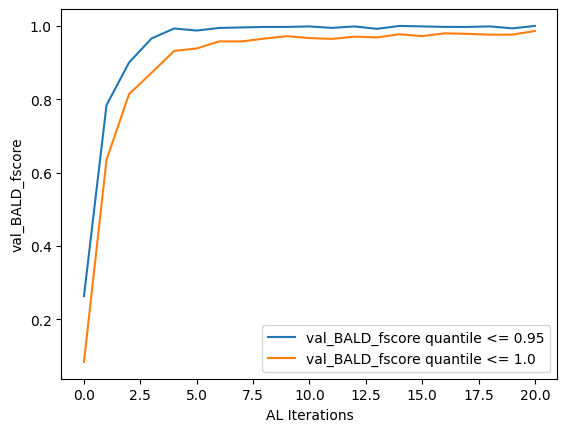

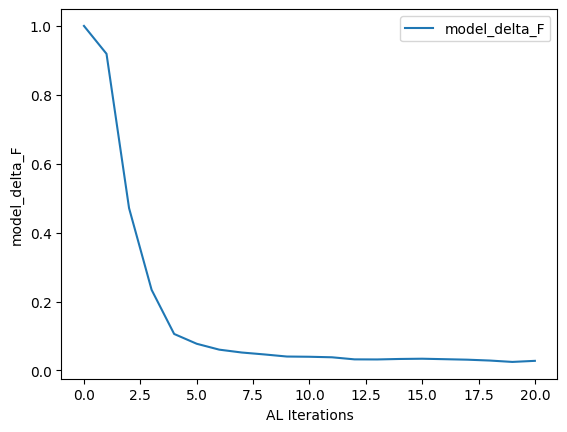

In [3]:
# Once trained, we can get some simple automatically generated plots of
# our performance metrics quite easily.

AL.plot_metrics()

In [ ]:
# Advanced usage: Stopping Conditions

# Here is some example code for stopping the training loop early if 
# the validation F score doesn't achieve a new maximum for three
# rounds. Like the previous long training script, this will take hours to run.
from bfbrain import FScoreNotImproving

AL.AL_loop('saved_AL_stopping', nstop = 20, stopping_cond = FScoreNotImproving(metric_name = AL.metrics[0].name, patience = 3), verbose = True)

In [5]:
# We can also judge when the stopping condition WOULD have stopped an already-trained network

from bfbrain import FScoreNotImproving

FScoreNotImproving(metric_name = AL.metrics[0].name, patience = 3).find_stopping_index({metric.name: metric for metric in AL.metrics})

13